In [1]:
!pip install recommenders mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.3/355.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.2/264.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.1/501.1 kB 34.8 MB/s e

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
DATA_PATH = '/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/goodbooks-10k'

In [4]:
ratings = pd.read_csv(f'{DATA_PATH}/ratings.csv')
books = pd.read_csv(f'{DATA_PATH}/books.csv')
tags = pd.read_csv(f'{DATA_PATH}/tags.csv')
book_tags = pd.read_csv(f'{DATA_PATH}/book_tags.csv')
to_read = pd.read_csv(f'{DATA_PATH}/to_read.csv')

In [ ]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [ ]:
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [ ]:
tags

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [ ]:
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [ ]:
to_read

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


## EDA

In [ ]:
len(ratings), len(books)

(5976479, 10000)

In [ ]:
len(ratings['user_id'].unique()), len(ratings['book_id'].unique())

(53424, 10000)

In [ ]:
book_stat_by_user = ratings.groupby('user_id').agg({'book_id':'nunique'})
book_stat_by_user[["book_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
book_id,53424.0,111.868804,26.071224,19.0,96.0,111.0,128.0,200.0


In [ ]:
user_stat_by_book = ratings.groupby('book_id').agg({'user_id':'nunique'})
user_stat_by_book[["user_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10000.0,597.6479,1267.289788,8.0,155.0,248.0,503.0,22806.0


<Axes: xlabel='book_id', ylabel='Count'>

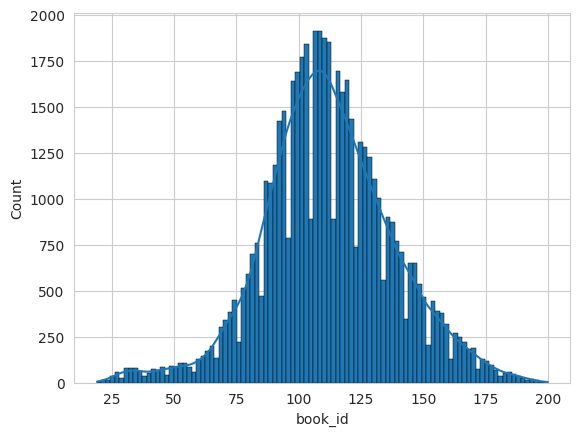

In [ ]:
sns.histplot(book_stat_by_user["book_id"],bins=100,alpha=1,fill=True, kde=True, edgecolor="black")

<Axes: title={'center': 'Score Distribution'}, xlabel='rating'>

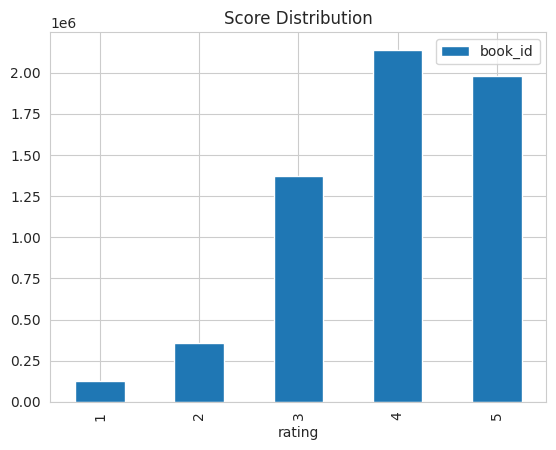

In [ ]:
ratings.groupby('rating').count()[['book_id']].plot(kind="bar", title="Score Distribution")

In [ ]:
ratings[['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,5976479.0,3.919866,0.991087,1.0,3.0,4.0,5.0,5.0


In [ ]:
user_score_stat =  ratings.groupby('user_id').agg({'rating':['min','mean','median','max','std']})
user_score_stat.columns = ["_".join(a) for a in user_score_stat.columns.to_flat_index()]
user_score_stat[["rating_mean"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating_mean,53424.0,3.928512,0.449543,1.0,3.633929,3.920455,4.223214,5.0


<Axes: xlabel='rating_mean', ylabel='Count'>

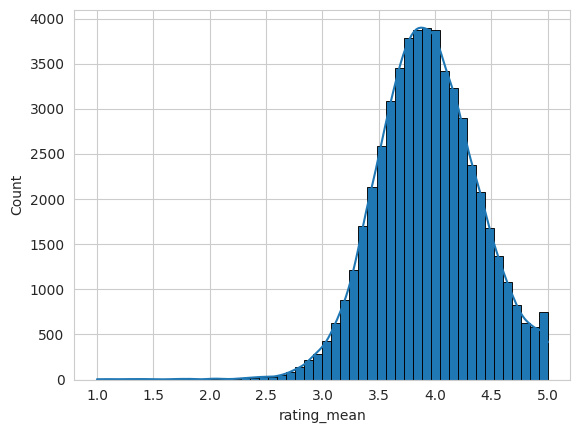

In [ ]:
sns.histplot(user_score_stat["rating_mean"],bins=50,alpha=1,fill=True, kde=True, edgecolor="black")

## Sampling

### Create Dummy Time

In [ ]:
ratings[:20]

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4
6,2,315,3
7,2,33,4
8,2,301,5
9,2,2686,5


In [ ]:
start_time = pd.Timestamp("2024-01-01 00:00:00")

ratings["time"] = ratings.groupby("user_id").cumcount().apply(lambda x: start_time + pd.Timedelta(minutes=x))

In [ ]:
ratings[:20]

,user_id,book_id,rating,time
0,1,258,5,2024-01-01 00:00:00
1,2,4081,4,2024-01-01 00:00:00
2,2,260,5,2024-01-01 00:01:00
3,2,9296,5,2024-01-01 00:02:00
4,2,2318,3,2024-01-01 00:03:00
5,2,26,4,2024-01-01 00:04:00
6,2,315,3,2024-01-01 00:05:00
7,2,33,4,2024-01-01 00:06:00
8,2,301,5,2024-01-01 00:07:00
9,2,2686,5,2024-01-01 00:08:00


In [ ]:
books_above_2 = ratings[ratings.rating > 2]

In [ ]:
len(books_above_2)

5493027

In [ ]:
len(books_above_2['user_id'].unique()), len(books_above_2['book_id'].unique())

(53418, 10000)

In [ ]:
user_stat_by_book = books_above_2.groupby('book_id').agg({'user_id':'nunique'})
top_1000_books = user_stat_by_book.sort_values('user_id', ascending=False).index[:1000]

In [ ]:
books[books.book_id.isin(top_1000_books[:20])][['book_id', 'authors', 'original_title']]

,book_id,authors,original_title
0,1,Suzanne Collins,The Hunger Games
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone
3,4,Harper Lee,To Kill a Mockingbird
4,5,F. Scott Fitzgerald,The Great Gatsby
6,7,J.R.R. Tolkien,The Hobbit or There and Back Again
7,8,J.D. Salinger,The Catcher in the Rye
9,10,Jane Austen,Pride and Prejudice
12,13,"George Orwell, Erich Fromm, Celâl Üster",Nineteen Eighty-Four
13,14,George Orwell,Animal Farm: A Fairy Story
15,16,"Stieg Larsson, Reg Keeland",Män som hatar kvinnor


In [ ]:
book_rating_filtered = books_above_2[books_above_2.book_id.isin(top_1000_books)]

In [ ]:
book_stat_by_user = book_rating_filtered.groupby('user_id').agg({'book_id':'nunique'})
book_stat_by_user = book_stat_by_user[book_stat_by_user['book_id'] >= 20]

sample_10000_users = book_stat_by_user.sample(n=10000, random_state=2025, replace=False).index

In [ ]:
sample_10000_users

Index([49504, 31443, 31395, 18828, 43697, 15255,   518, 48715, 29449, 23133,
       ...
       36580, 25383, 30713,  5787, 11908, 51810, 52160, 49564, 12344,   146],
      dtype='int64', name='user_id', length=10000)

In [ ]:
book_rating_filtered = book_rating_filtered[book_rating_filtered.user_id.isin(sample_10000_users)]

In [ ]:
len(book_rating_filtered), len(book_rating_filtered['user_id'].unique()), len(book_rating_filtered['book_id'].unique())

(578237, 10000, 1000)

In [ ]:
book_stat_by_user = book_rating_filtered.groupby('user_id').agg({'book_id':'nunique'})
book_stat_by_user[["book_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
book_id,10000.0,57.8237,21.853791,20.0,41.0,56.0,72.0,158.0


In [ ]:
user_stat_by_book = book_rating_filtered.groupby('book_id').agg({'user_id':'nunique'})
user_stat_by_book[["user_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,578.237,530.405546,153.0,272.0,389.5,637.25,4400.0


### Chronological Split

In [ ]:
from recommenders.datasets.python_splitters import python_chrono_split

In [ ]:
book_rating_filtered

,user_id,book_id,rating,time
12,4,70,4,2024-01-01 00:00:00
13,4,264,3,2024-01-01 00:01:00
14,4,388,4,2024-01-01 00:02:00
15,4,18,5,2024-01-01 00:03:00
16,4,27,5,2024-01-01 00:04:00
...,...,...,...,...
5976123,15292,459,5,2024-01-01 02:29:00
5976147,15772,112,5,2024-01-01 01:24:00
5976150,15772,136,3,2024-01-01 01:26:00
5976168,42292,217,3,2024-01-01 02:11:00


In [ ]:
book_rating_filtered["time"] = pd.to_datetime(book_rating_filtered["time"])

In [ ]:
data_train_full, data_test = python_chrono_split(
    book_rating_filtered, ratio=0.80, filter_by="user",
    col_user="user_id", col_item="book_id", col_timestamp="time"
)

data_train, data_valid = python_chrono_split(
    data_train_full, ratio=0.80, filter_by="user",
    col_user="user_id", col_item="book_id", col_timestamp="time"
)

In [ ]:
len(data_train_full), len(data_train), len(data_valid), len(data_test)

(462630, 370057, 92573, 115607)

In [ ]:
data_train[data_train.user_id == 4]

,user_id,book_id,rating,time
12,4,70,4,2024-01-01 00:00:00
13,4,264,3,2024-01-01 00:01:00
14,4,388,4,2024-01-01 00:02:00
15,4,18,5,2024-01-01 00:03:00
16,4,27,5,2024-01-01 00:04:00
...,...,...,...,...
266,4,387,4,2024-01-01 01:13:00
267,4,497,5,2024-01-01 01:14:00
271,4,489,5,2024-01-01 01:18:00
272,4,1435,4,2024-01-01 01:19:00


In [ ]:
data_valid[data_valid.user_id == 4]

,user_id,book_id,rating,time
275,4,401,4,2024-01-01 01:22:00
276,4,131,4,2024-01-01 01:23:00
1238,4,81,5,2024-01-01 01:25:00
1239,4,468,4,2024-01-01 01:26:00
1240,4,1210,5,2024-01-01 01:27:00
1241,4,436,3,2024-01-01 01:28:00
1242,4,101,4,2024-01-01 01:29:00
2315,4,4,4,2024-01-01 01:30:00
2316,4,398,3,2024-01-01 01:31:00
2317,4,117,4,2024-01-01 01:32:00


In [ ]:
data_test[data_test.user_id == 4]

,user_id,book_id,rating,time
195065,4,508,3,2024-01-01 01:42:00
195068,4,704,3,2024-01-01 01:45:00
195070,4,230,4,2024-01-01 01:46:00
195072,4,181,3,2024-01-01 01:48:00
195073,4,54,4,2024-01-01 01:49:00
195074,4,354,3,2024-01-01 01:50:00
195075,4,326,3,2024-01-01 01:51:00
195077,4,72,3,2024-01-01 01:53:00
195078,4,62,4,2024-01-01 01:54:00
195079,4,7,4,2024-01-01 01:55:00


In [ ]:
PATH_TO_PROCESSED_DATA = '/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/goodbooks-10k/data_sample_split/'

In [ ]:
book_rating_filtered.to_csv(PATH_TO_PROCESSED_DATA + 'all_filtered_data.txt', sep='\t', index=False)

In [ ]:
data_train_full.to_csv(PATH_TO_PROCESSED_DATA + 'data_train_full.tsv', sep='\t', index=False)
data_train.to_csv(PATH_TO_PROCESSED_DATA + 'data_train.tsv', sep='\t', index=False)
data_valid.to_csv(PATH_TO_PROCESSED_DATA + 'data_valid.tsv', sep='\t', index=False)
data_test.to_csv(PATH_TO_PROCESSED_DATA + 'data_test.tsv', sep='\t', index=False)

## EDA Data Sampled

In [5]:
book_rating_filtered = pd.read_csv('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/goodbooks-10k/data_sample_split/all_filtered_data.txt', sep="\t")

In [6]:
len(book_rating_filtered)

578237

In [ ]:
book_rating_filtered

,user_id,book_id,rating,time
0,4,70,4,2024-01-01 00:00:00
1,4,264,3,2024-01-01 00:01:00
2,4,388,4,2024-01-01 00:02:00
3,4,18,5,2024-01-01 00:03:00
4,4,27,5,2024-01-01 00:04:00
...,...,...,...,...
578232,15292,459,5,2024-01-01 02:29:00
578233,15772,112,5,2024-01-01 01:24:00
578234,15772,136,3,2024-01-01 01:26:00
578235,42292,217,3,2024-01-01 02:11:00


In [7]:
count_book_read_user = book_rating_filtered.groupby('user_id').agg({'book_id':'nunique', 'rating':'mean'})
count_book_read_user[["book_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
book_id,10000.0,57.8237,21.853791,20.0,41.0,56.0,72.0,158.0


In [8]:
count_book_read_user[["rating"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,10000.0,4.134752,0.346758,3.0,3.895479,4.117647,4.363636,5.0


In [10]:
count_user_in_book = book_rating_filtered.groupby('book_id').agg({'user_id':'nunique', 'rating':'mean'})
count_user_in_book[["user_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,578.237,530.405546,153.0,272.0,389.5,637.25,4400.0


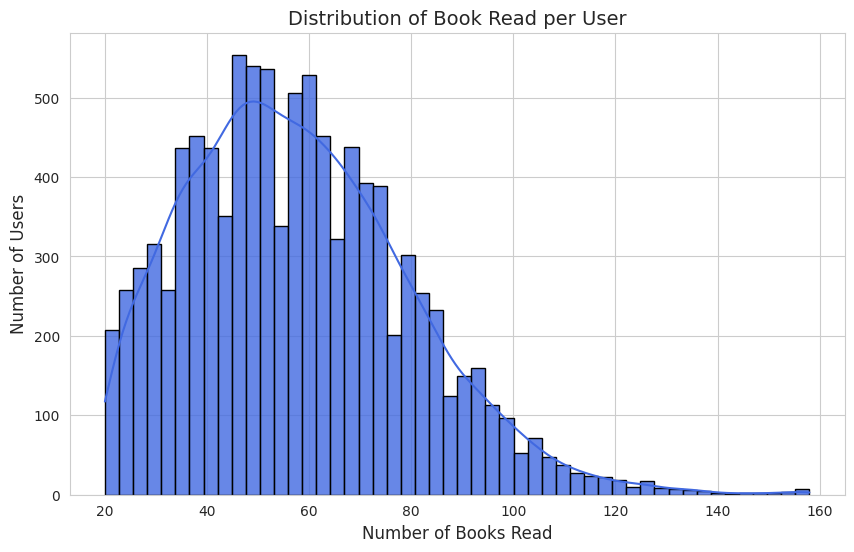

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(count_book_read_user["book_id"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Distribution of Book Read per User", fontsize=14)
plt.xlabel("Number of Books Read", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.show()

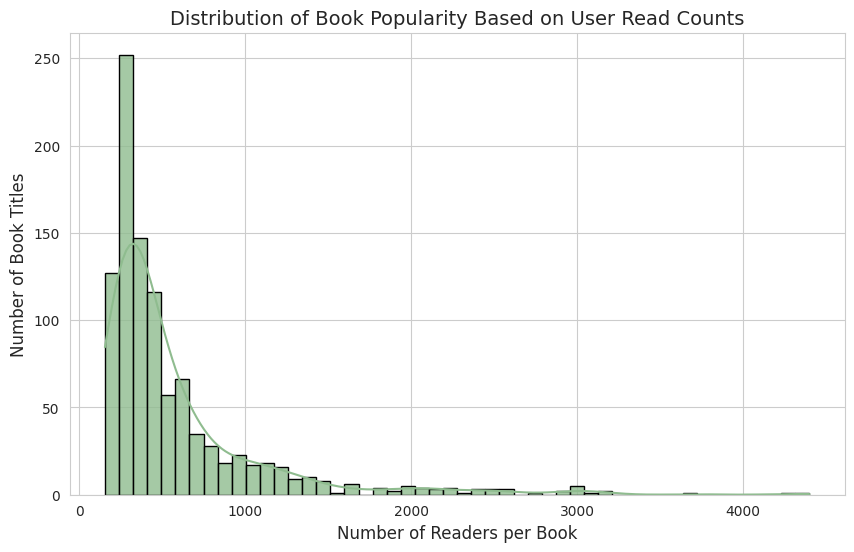

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(count_user_in_book["user_id"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="darkseagreen")
plt.title("Distribution of Movie Popularity Based on User Read Counts", fontsize=14)
plt.xlabel("Number of Readers per Book", fontsize=12)
plt.ylabel("Number of Book Titles", fontsize=12)
plt.show()

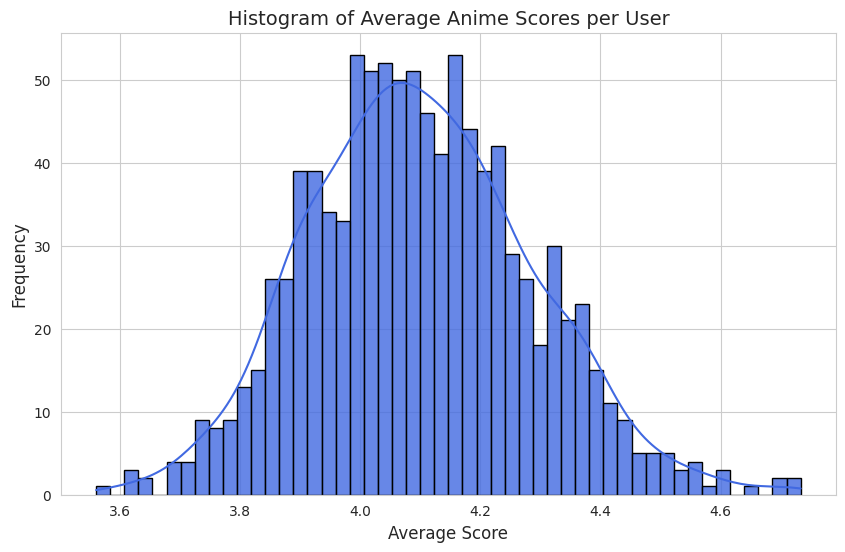

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(count_user_in_book["rating"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Histogram of Average Anime Scores", fontsize=14)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
anime_stat = book_rating_filtered.groupby('book_id').agg({'user_id': 'count', 'rating':'mean'})
anime_stat[['user_id']].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,578.237,530.405546,153.0,272.0,389.5,637.25,4400.0


### Book Information

In [ ]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [ ]:
top_3_book = books.sort_values('ratings_count', ascending=False)[:3]

In [ ]:
top_3_book

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [ ]:
from IPython.display import display, HTML

html = """
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
            background-color: white;
        }
        th, td {
            border: 1px solid black;
            padding: 15px;
            text-align: left;
            color: black;
            font-family: Arial, sans-serif;
        }
        th {
            background-color: #f2f2f2;
            font-size: 18px;
        }
        td {
            font-size: 16px;
            color: #333;
        }
        img {
            display: block;
            margin: auto;
        }
    </style>
    <table>
        <tr>
            <th><Picture></th>
            <th>Description</th>
        </tr>
    """

for _, row in top_3_book.iterrows():
    html += f"""
    <tr>
        <td><img src='{row["small_image_url"]}' width='100'></td>
        <td><strong>{row["title"]}</strong><br>{row["authors"]} ({int(row["original_publication_year"])})
        <br>Mean Rating: {row["average_rating"]}<br></td>
    </tr>
    """

html += "</table>"
display(HTML(html))

,Description
,"The Hunger Games (The Hunger Games, #1)Suzanne Collins (2008) Mean Rating: 4.34"
,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)J.K. Rowling, Mary GrandPré (1997) Mean Rating: 4.44"
,"Twilight (Twilight, #1)Stephenie Meyer (2005) Mean Rating: 3.57"


### Calculate Sparsity

In [6]:
len(ratings), len(book_rating_filtered)

(5976479, 578237)

In [8]:
from scipy.sparse import csr_matrix

def calculate_sparsity(user_item_matrix):
  matrix = user_item_matrix.pivot_table(index='user_id', columns='book_id', values='rating', fill_value=0)
  sparse_matrix = csr_matrix(matrix.values)

  total_possible = matrix.shape[0] * matrix.shape[1]

  nonzero_count = sparse_matrix.count_nonzero()

  sparsity = 1 - (nonzero_count / total_possible)
  return sparsity

In [9]:
calculate_sparsity(ratings)

0.988813119571728

In [10]:
calculate_sparsity(book_rating_filtered)

0.9421763

### Check Sequence Dependence

In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [7]:
books_title = books[['book_id', 'original_title']].set_index('book_id')
book_rating_title = book_rating_filtered.join(books_title, on="book_id", how="inner")

In [8]:
book_rating_title = book_rating_title.dropna()

In [9]:
len(book_rating_title)

570999

In [10]:
sequences_sample = book_rating_title.groupby('user_id')['original_title'].apply(list).tolist()

In [11]:
te = TransactionEncoder()
te_ary = te.fit(sequences_sample).transform(sequences_sample)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Animal Farm & 1984,The Fellowship of the Ring,11/22/63,1776,1st To Die,2001: A Space Odyssey,A Breath of Snow and Ashes,A Brief History of Time: From the Big Bang to Black Holes,"A Child Called ""It"": One Child's Courage to Survive",A Christmas Carol,...,Мастер и Маргарита,Преступление и наказание,Ἰλιάς,Ὀδύσσεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,いちきゅうはちよん [Ichi-Kyū-Hachi-Yon],ねじまき鳥クロニクル [Nejimakidori kuronikuru],ノルウェイの森 [Noruwei no Mori],孫子兵法 [Sūnzi bīngfǎ],海辺のカフカ [Umibe no Kafuka]
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)

In [13]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [14]:
len(rules)

12073

In [16]:
rules['len_antecedents'] = rules['antecedents'].str.len()
rules['len_consequents'] = rules['consequents'].str.len()

In [17]:
top_10_rules = rules[(rules.len_antecedents == 1) & (rules.len_consequents == 1)].sort_values('confidence', ascending=False)[:20]

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
G = nx.DiGraph()

# Add edges (rules) to graph
for idx, row in top_10_rules.iterrows():
    ant = ', '.join(row['antecedents'])  # Join if multiple items
    cons = ', '.join(row['consequents'])
    conf = row['confidence']
    G.add_edge(ant, cons, weight=conf)

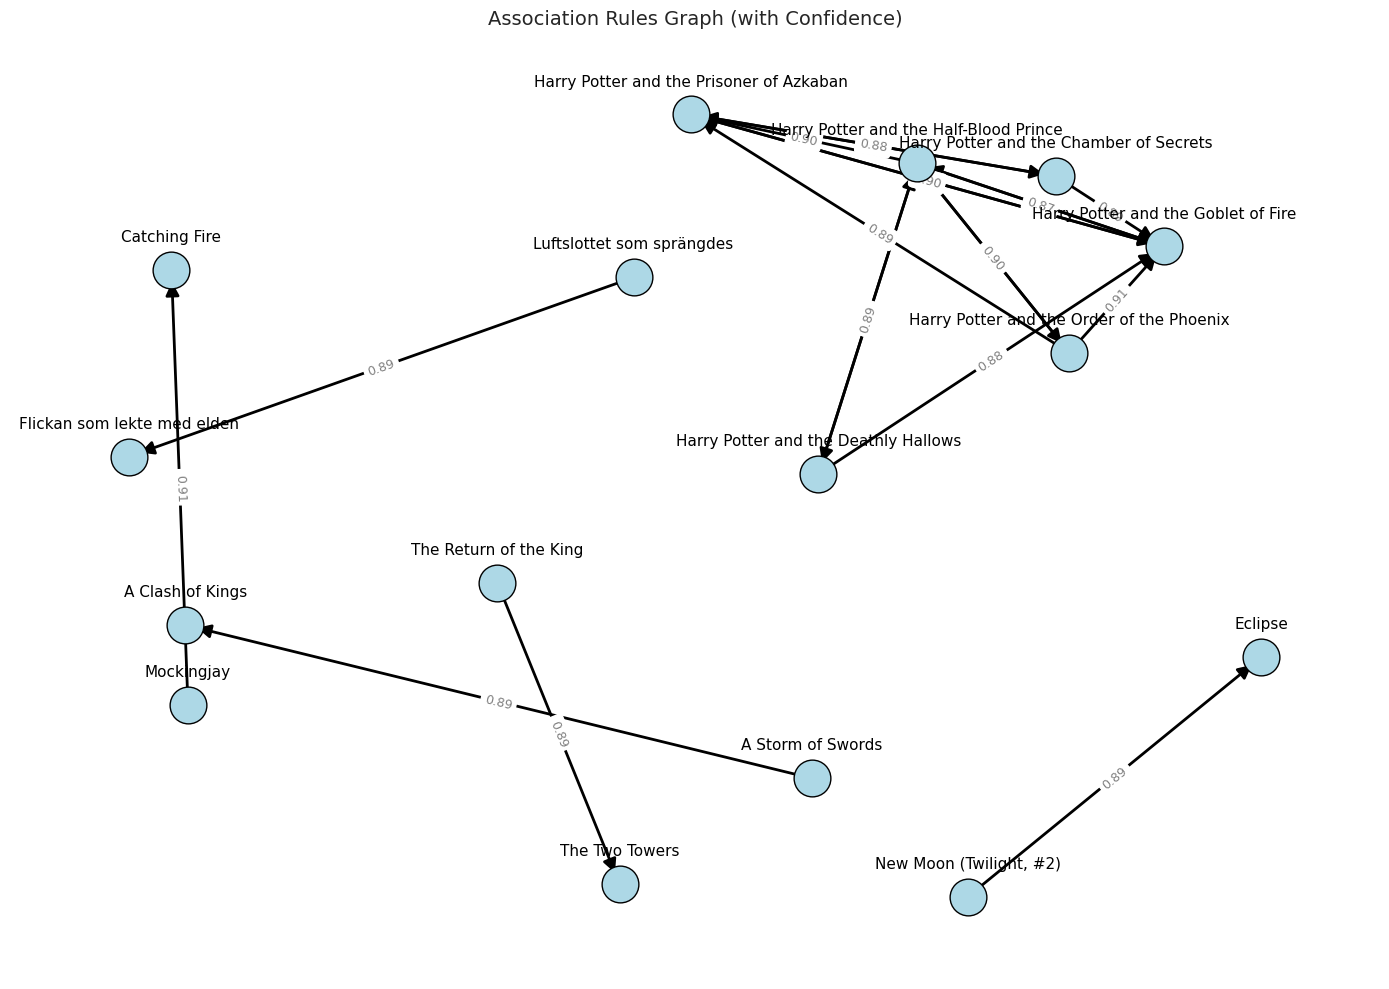

In [20]:
pos = nx.spring_layout(G, seed=42, k=1.2)

# Extract weights (confidence)
weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_colors = weights
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}

# Create figure
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(
    G, pos,
    width=2,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=20# slight curve for better visibility
)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue', edgecolors='black')

# Draw node labels (above nodes)
label_pos = {k: (v[0], v[1] + 0.08) for k, v in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=11)

# Draw edge labels (confidence)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=9)

# Final touches
plt.title("Association Rules Graph (with Confidence)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()